<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**: Mohammad Morsali

**Student ID**: 400101956





## Importing Libraries

First we import libraries that we need for this assignment.

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# import any other libraries needed below

## Reading Data and Preprocessing

In this section, we want to read data from a CSV file and then preprocess it to make it ready for the rest of the problem.

First, we read the data in the cell below and extract an $m \times n$ matrix, $X$, and an $m \times 1$ vector, $Y$, from it, which represent our knowledge about the features of the data (`X1`, `X2`, `X3`) and the class (`Y`), respectively. Note that by $m$, we mean the number of data points and by $n$, we mean the number of features.

In [2]:
X, Y = None, None

### START CODE HERE ###
dataset = pd.read_csv('Q3/data_logistic.csv')
X = dataset.drop(dataset.columns[-1], axis=1).values
Y = dataset[dataset.columns[-1]].values
### END CODE HERE ###

print(X.shape)
print(Y.shape)

(10000, 3)
(10000,)


Next, we should normalize our data. For normalizing a vector $\mathbf{x}$, a very common method is to use this formula:

$$
\mathbf{x}_{norm} = \dfrac{\mathbf{x} - \overline{\mathbf{x}}}{\sigma_\mathbf{x}}
$$

Here, $\overline{x}$ and $\sigma_\mathbf{x}$ denote the mean and standard deviation of vector $\mathbf{x}$, respectively. Use this formula and store the new $X$ and $Y$ vectors in the cell below.

**Question**: Briefly explain why we need to normalize our data before starting the training.

**Answer**: 

1. Enhanced Model Performance: The implementation of normalization proves pivotal in enhancing the efficacy of various machine learning models. This aspect bears heightened significance for algorithms reliant on distance computations like k-nearest neighbors (KNN) or support vector machines (SVMs), wherein features with wider ranges may wield disproportionate influence over the distance metric. By normalizing features onto a similar scale, disparities in feature ranges are mitigated, thereby bolstering model performance across the board.

To elucidate, consider scenarios where certain features span significantly broader ranges than others. Without normalization, these features could unduly skew the computation of distances, leading to biased model outcomes. Through normalization, such discrepancies are rectified, fostering a more equitable assessment of feature importance within the model's decision-making process.

2. Accelerated Convergence: The strategic application of normalization extends beyond mere performance enhancements, extending its utility to expediting the convergence of gradient-based optimization algorithms, particularly those underpinning neural networks. In instances where features exhibit starkly disparate scales, the optimization process encounters inefficiencies, attributable to the incongruity in gradient magnitudes across features. Normalizing features serves to rectify this imbalance by aligning gradient magnitudes, thereby facilitating swifter convergence of optimization algorithms.

In practical terms, consider scenarios where features exhibit orders of magnitude differences in scale. Without normalization, the optimization process may languish, as gradients corresponding to features with larger scales dominate the optimization trajectory. Through normalization, the optimization landscape is rendered more uniform, enabling optimization algorithms to traverse it with greater alacrity.

3. Mitigation of Numerical Quandaries: The absence of normalization can precipitate numerical quandaries, ranging from overflow to underflow, particularly when unnormalized data is fed into certain machine learning models. By subjecting data to normalization, such issues are preemptively averted, ensuring that data remains within a computationally tractable range.

To illustrate, consider scenarios where unnormalized data, characterized by vastly divergent scales, is utilized as input for machine learning models. In such instances, numerical instability may arise, manifesting as computational errors or divergent model behavior. Through normalization, data is rescaled to a manageable range, thereby circumventing the specter of numerical instability and fortifying the robustness of model computations.

4. Safeguarding Against Data Leakage: The timing of normalization within the data preprocessing pipeline assumes paramount importance, particularly in safeguarding against the insidious phenomenon of data leakage. If normalization is conducted subsequent to the partitioning of data into training and test sets, there exists a risk of inadvertently incorporating information from the test set into the training process, thereby compromising the integrity of model evaluation metrics.

By preemptively normalizing data prior to partitioning, the sanctity of the test set is preserved, ensuring that it remains wholly independent of the training process. This precludes any inadvertent influence exerted by the test set on model training, thereby furnishing more accurate and reliable performance estimates.

5. Improved Interpretability: Normalization contributes to the interpretability of machine learning models by ensuring that the impact of each feature on the model's predictions is more easily discernible. In scenarios where features possess varying scales, the interpretation of feature importance becomes convoluted, as features with larger scales may overshadow others in their contribution to the model's decision-making process. Through normalization, features are placed on a level playing field, allowing for clearer insights into their respective influences on model outcomes.

6. Robustness to Outliers: Normalization aids in rendering machine learning models more resilient to the presence of outliers within the dataset. Outliers, characterized by their significant deviation from the norm, can disproportionately affect model training and inference, particularly in algorithms sensitive to the scale of features. By normalizing features, the impact of outliers is mitigated, as their influence is dampened within the normalized feature space. This fosters a more stable and reliable modeling process, less prone to the undue influence of anomalous data points.

7. Facilitation of Feature Engineering: Normalization serves as a precursor to effective feature engineering, providing a standardized framework within which feature transformations can be applied. By normalizing features prior to undertaking feature engineering endeavors such as polynomial transformations or interaction term creation, the efficacy of such transformations is maximized. This is owing to the fact that normalization ensures that features are uniformly scaled, thereby optimizing the efficacy of subsequent feature engineering operations.

8. Improved Generalization: Normalization aids in enhancing the generalization capability of machine learning models by mitigating the impact of dataset-specific characteristics on model performance. In scenarios where datasets exhibit inherent biases or idiosyncrasies, normalization serves to normalize these variations, enabling models to generalize more effectively across diverse datasets. By promoting model robustness and adaptability, normalization engenders models capable of extrapolating insights gleaned from training data to unseen data instances with greater fidelity.

9. Compatibility with Diverse Algorithms: Normalization confers versatility to machine learning pipelines by ensuring compatibility with a wide array of algorithms spanning various domains. Whether it be regression, classification, or clustering algorithms, normalization fosters a standardized data representation conducive to the optimal functioning of diverse modeling techniques. By providing a consistent framework for data preprocessing, normalization streamlines the integration of disparate algorithms into cohesive machine learning workflows, thereby enhancing the scalability and interoperability of machine learning systems.

In [3]:
### START CODE HERE ###
X = (X - X.mean(axis=0)) / X.std(axis=0)
### END CODE HERE ###

Finally, we should add a column of $1$s at the beginning of $X$ to represent the bias term. Do this in the next cell. Note that after this process, $X$ should be an $m \times (n+1)$ matrix.

In [4]:
### START CODE HERE ###
X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
### END CODE HERE ###
X.shape

(10000, 4)

## Training Model

### Sigmoid Function
You should begin by implementing the $\sigma(\mathbf{x})$ function. Recall that the logistic regression hypothesis $\mathcal{h}()$ is defined as:
$$
\mathcal{h}_{\theta}(\mathbf{x}) = \mathcal{g}(\theta^\mathbf{T}\mathbf{x})
$$
where $\mathcal{g}()$ is the sigmoid function as:
$$
\mathcal{g}(\mathbf{z}) = \frac{1}{1+exp^{-\mathbf{z}}}
$$
The Sigmoid function has the property that $\mathbf{g}(+\infty)\approx 1$ and $\mathcal{g}(−\infty)\approx0$. Test your function by calling `sigmoid(z)` on different test samples. Be certain that your sigmoid function works with both vectors and matrices - for either a vector or a matrix, your function should perform the sigmoid function on every element.

In [5]:
def sigmoid(Z):
    '''
    Applies the sigmoid function on every element of Z
    Arguments:
        Z can be a (n,) vector or (n , m) matrix
    Returns:
        A vector/matrix, same shape with Z, that has the sigmoid function applied elementwise
    '''
    ### START CODE HERE ###
    return 1 / (1 + np.exp(-Z))
    ### END CODE HERE ###

In [6]:
# Test with a single value
print(sigmoid(0))
print(sigmoid(-100))
print(sigmoid(100))

# Test with a vector of zeros
z = np.zeros(5)
print(sigmoid(z))

# Test with a vector of ones
z = np.ones(5)
print(sigmoid(z))

# Test with a matrix of random values
z = np.random.randn(3, 3)
print(sigmoid(z))

# Test with a large matrix
z = np.random.randn(1000, 1000)
print(sigmoid(z))

0.5
3.7200759760208356e-44
1.0
[0.5 0.5 0.5 0.5 0.5]
[0.73105858 0.73105858 0.73105858 0.73105858 0.73105858]
[[0.11933649 0.23680244 0.86306371]
 [0.55653626 0.7082075  0.49735102]
 [0.70505889 0.1251373  0.47263863]]
[[0.3984408  0.30270873 0.62422459 ... 0.68804661 0.75490072 0.57862256]
 [0.2914886  0.85719949 0.30861428 ... 0.35025312 0.67192313 0.85286792]
 [0.17638243 0.82588531 0.45068651 ... 0.27066882 0.37758349 0.62521943]
 ...
 [0.20283354 0.35843565 0.65940178 ... 0.51034987 0.28611658 0.36488863]
 [0.39956271 0.75786506 0.42607426 ... 0.80594531 0.55889466 0.47632846]
 [0.70458724 0.13363316 0.73648551 ... 0.5555358  0.26111183 0.24824902]]


### Cost Function 
Implement the functions to compute the cost function. Recall the cost function for logistic regression is a scalar value given by:
$$
\mathcal{J}(\theta) = \sum_{i=1}^{n}[-y^{(i)}\log{(\mathcal{h}_\theta(\mathbf{x}^{(i)}))}-(1-y^{(i)})\log{(1-\mathcal{h}_\theta(\mathbf{x}^{(i)}))}] + \frac{\lambda}{2}||\theta||_2^2
$$

In [7]:
def computeCost(theta, X, y, regLambda):
    '''
    Computes the cost function for logistic regression with regularization
    Arguments:
        theta is a d-dimensional numpy vector
        X is a n-by-d numpy matrix
        y is an n-dimensional numpy vector
        regLambda is the scalar regularization constant
    Returns:
        a scalar value of the cost
    '''

    # Check if the dimensions of theta and X are compatible
    if X.shape[1] != theta.shape[0]:
        raise ValueError("Incompatible dimensions: X has {} columns but theta has {} elements.".format(X.shape[1], theta.shape[0]))

    # Check if the dimensions of X and y are compatible
    if X.shape[0] != y.shape[0]:
        raise ValueError("Incompatible dimensions: X has {} rows but y has {} elements.".format(X.shape[0], y.shape[0]))

    num_samples, num_features = X.shape
    cost_value = None
    ### START CODE HERE ###
    # Compute the hypothesis function for logistic regression
    hypothesis = sigmoid(X @ theta)
    
    # Compute the cost using the cross-entropy loss function
    cost_value = (-y * np.log(hypothesis) - (1 - y) * np.log(1 - hypothesis)).mean()
    
    # If regularization parameter is greater than 0, compute the regularization term
    if regLambda > 0:
        regularization_term = (regLambda / (2 * num_samples)) * np.sum(theta[1:]**2)
        
        # Add the regularization term to the cost
        cost_value += regularization_term
    ### END CODE HERE ###
    return cost_value

### Gradient of the Cost Function
Now, we want to calculate the gradient of the cost function. The gradient of the cost function is a d-dimensional vector.\
We must be careful not to regularize the $\theta_0$ parameter (corresponding to the first feature we add to each instance), and so the 0's element is given by:
$$
\frac{\partial \mathcal{J}(\theta)}{\partial \theta_0} = \sum_{i=1}^n (\mathcal{h}_\theta(\mathbf{x}^{(i)})-y^{(i)})
$$

Question: What is the answer to this problem for the $j^{th}$ element (for $j=1...d$)?

Answer:

$$\frac{\partial J(\theta)}{\partial \theta_j} = \dfrac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})* x_j^{(i)} + \frac{\lambda}{m}\theta_j $$

In [8]:
def computeGradient(theta, X, y, regLambda):
    '''
    This function computes the gradient of the objective function for logistic regression with regularization.
    
    Arguments:
        theta: A d-dimensional numpy vector representing the parameters of the logistic regression model.
        X: An n-by-d numpy matrix where each row represents a sample and each column represents a feature.
        y: An n-dimensional numpy vector where each element represents the target value for a sample.
        regLambda: A scalar that represents the regularization constant.

    Returns:
        gradient: A d-dimensional vector that represents the gradient of the objective function.
    '''

    # Check if the number of features in X matches the number of parameters in theta
    if X.shape[1] != theta.shape[0]:
        raise ValueError("Incompatible dimensions: X has {} columns but theta has {} elements.".format(X.shape[1], theta.shape[0]))

    # Check if the number of samples in X matches the number of target values in y
    if X.shape[0] != y.shape[0]:
        raise ValueError("Incompatible dimensions: X has {} rows but y has {} elements.".format(X.shape[0], y.shape[0]))

    # Get the number of samples and features from X
    num_samples, num_features = X.shape

    # Initialize the gradient vector with zeros
    gradient = np.zeros(theta.shape)

    # Compute the hypothesis function for logistic regression
    hypothesis = 1 / (1 + np.exp(-X @ theta))

    # Compute the gradient for the bias term (theta[0])
    gradient[0] = np.mean(hypothesis - y)

    # Compute the gradient for the remaining terms (theta[1:]).
    # This includes the regularization term for theta[1:]
    gradient[1:] = (X[:, 1:].T @ (hypothesis - y)) / num_samples + (regLambda * theta[1:]) / num_samples

    return gradient

### Training and Prediction
Once you have the cost and gradient functions complete, implemen tthe fit and predict methods.\
Your fit method should train the model via gradient descent, relying on the cost and gradient functions. This function should return two parameters. The first parameter is $\theta$, and the second parameter is a `numpy` array that contains the loss in each iteration. This array is indicated by `loss_history` in the code.\
Instead of simply running gradient descent for a specific number of iterations, we will use a more sophisticated method: we will stop it after the solution hasconverged. Stop the gradient descent procedure when $\theta$ stops changing between consecutive iterations. You can detect this convergence when:
$$
||\theta_{new}-\theta_{old}||_2 <= \epsilon,
$$
for some small $\epsilon$ (e.g, $\epsilon=10E-4$).\
For readability, we’d recommend implementing this convergence test as a dedicated function `hasConverged`.

In [9]:
def fit(X, y, regLambda = 0.01, alpha = 0.01, epsilon = 1e-4, maxNumIters = 100):
    '''
    This function trains a logistic regression model using gradient descent.
    
    Arguments:
        X: An n-by-d numpy matrix where each row represents a sample and each column represents a feature.
        y: An n-dimensional numpy vector where each element represents the target value for a sample.
        regLambda: A scalar that represents the regularization constant.
        alpha: The learning rate for gradient descent.
        epsilon: The convergence rate for gradient descent.
        maxNumIters: The maximum number of iterations for gradient descent.

    Returns:
        parameters: The parameters of the logistic regression model.
        cost_history: A list that contains the cost function value at each iteration.
    '''

    assert X.shape[0] == y.shape[0], "The number of samples in X and y must be the same."
    assert regLambda > 0, "The regularization constant must be a positive number."
    assert alpha > 0, "The learning rate must be a positive number."
    assert epsilon > 0, "The convergence rate must be a positive number."
    assert isinstance(maxNumIters, int) and maxNumIters > 0, "The maximum number of iterations must be a positive integer."

    # Get the number of samples and features from X
    num_samples, num_features = X.shape

    # Initialize the parameters with zeros
    parameters = np.zeros(num_features)

    # Initialize the cost history list
    cost_history = []

    # Initialize iteration counter
    iteration = 0

    # Perform gradient descent
    while iteration < maxNumIters:
        # Save the old parameters
        parameters_old = parameters.copy()

        # Compute the gradient
        gradient = computeGradient(parameters, X, y, regLambda)

        # Update the parameters
        parameters -= alpha * gradient

        # Compute the cost function value and add it to the cost history
        cost = computeCost(parameters, X, y, regLambda)
        cost_history.append(cost)

        # Print the progress
        if iteration % 10 == 0:
            print(f"Iteration: {iteration}, Cost: {cost}")

        # Check if the parameters have converged
        if hasConverged(parameters_old, parameters, epsilon):
            break

        # Increment iteration counter
        iteration += 1

    return parameters, cost_history




def hasConverged(theta_old, theta_new, epsilon):
    '''
    Return if the theta converged or not
    Arguments:
        theta_old   is the theta calculated in prevoius iteration
        theta_new   is the theta calculated in current iteration
        epsilon     is the convergence rate
    '''

    ### START CODE HERE ###
    return np.sqrt(np.sum((theta_new - theta_old)**2)) <= epsilon   
    ### END CODE HERE ###
    # return False

Finally, we want to evaluate our loss for this problem. Complete the cell below to calculate and print the loss of each iteration and the final theta of your model.

In [10]:
# Assuming X and Y are your data and labels respectively
theta, loss_history = fit(X, Y)

# Print the final model parameters
print("Final model parameters (theta):")
print(theta)

# Print the loss at each iteration
print("\nLoss at each iteration:")
for i, loss in enumerate(loss_history):
    print(f"Iteration {i}: {loss}")

Iteration: 0, Cost: 0.6914869052289024
Iteration: 10, Cost: 0.6753371740920454
Iteration: 20, Cost: 0.6599817178583085
Iteration: 30, Cost: 0.6453791235531212
Iteration: 40, Cost: 0.6314889786748717
Iteration: 50, Cost: 0.618272112954377
Iteration: 60, Cost: 0.6056907840959739
Iteration: 70, Cost: 0.5937088126996497
Iteration: 80, Cost: 0.5822916723447371
Iteration: 90, Cost: 0.5714065411171381
Final model parameters (theta):
[ 0.14721272 -0.21750811  0.23679233  0.07455652]

Loss at each iteration:
Iteration 0: 0.6914869052289024
Iteration 1: 0.6898349934816335
Iteration 2: 0.6881914029582332
Iteration 3: 0.6865560913372795
Iteration 4: 0.6849290163396847
Iteration 5: 0.6833101357324869
Iteration 6: 0.6816994073325776
Iteration 7: 0.6800967890103669
Iteration 8: 0.6785022386933872
Iteration 9: 0.6769157143698342
Iteration 10: 0.6753371740920454
Iteration 11: 0.6737665759799153
Iteration 12: 0.6722038782242507
Iteration 13: 0.6706490390900594
Iteration 14: 0.6691020169197816
Iteration 

### Testing Your Implementation
To test your logistic regression implementation, first you should use `train_test_split` function to split dataset into three parts:

- 70% for the training set
- 20% for the validation set
- 10% for the test set

Do this in the cell below.

In [11]:
X_train, Y_train, X_val, Y_val, X_test, Y_test = None, None, None, None, None, None
### START CODE HERE ###
X_train, X_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)
### END CODE HERE ###

Then, you should complete `predict` function to find the weight vector and the loss on the test data.

In [12]:
def predict(theta, X):
    '''
    Use the model to predict values for each instance in X
    Arguments:
        theta is d-dimensional numpy vector
        X     is a n-by-d numpy matrix
    Returns:
        an n-dimensional numpy vector of the predictions, the output should be binary (use h_theta > .5)
    '''

    ### START CODE HERE ###
# Calculate the linear predictions by taking the dot product of the feature matrix X and the parameter vector theta
# Store the linear predictions in the variable h
    h = [sigmoid(x) for x in np.dot(X, theta)]

    # Apply the sigmoid function to each linear prediction to obtain probabilities
    # Convert the probabilities to binary class predictions:
    # If the probability is greater than 0.5, assign the class label 1; otherwise, assign the class label 0
    Y = np.array([1 if i > 0.5 else 0 for i in h])

    ### END CODE HERE ###
    return Y

Now, run the `fit` and `predict` function for different values of the learning rate and regularization constant. Plot the `loss_history` of these different values for train and test data both in the same figure.

**Question**: Discuss the effect of the learning rate and regularization constant and find the best values of these parameters.

**Answer**:

Exploring the Dynamics of Learning Rate and Regularization: Illuminating the Path to Logistic Regression Mastery

Let us embark on an enriching voyage through the intricate landscapes of logistic regression, where the pivotal roles of learning rate and regularization constants sculpt the contours of model performance and generalization. Join us as we unravel the multifaceted effects of these parameters and chart a course towards optimal model optimization:

1. Learning Rate Unveiled: At the heart of gradient descent lies the learning rate, a beacon guiding our model's trajectory through the vast expanse of parameter space. Here, the choice of learning rate wields profound implications, dictating the tempo at which our model assimilates insights from the training data. Striking a delicate balance is paramount; a high learning rate risks hurtling past the global minimum of the cost function, inviting chaos and divergence. Conversely, a conservative learning rate may consign us to the doldrums of slow convergence and prolonged training durations. The pursuit of an optimal learning rate thus becomes a quest for equilibrium, where velocity and stability intertwine in a delicate dance.

2. Deciphering the Regularization Constant: Enter the realm of the regularization constant, the sentinel guarding against the perils of overfitting and model extravagance. Dubbed lambda, this parameter exerts a moderating influence on the impact of regularization within our model architecture. Its elevation begets a regime of austerity, compelling our model to eschew extravagance in favor of simplicity. Yet, tread cautiously, for an excess of regularization may precipitate the plight of underfitting, where the model's simplicity belies its inability to capture the nuances of the underlying data landscape.

3. Navigating Hyperparameter Space: Embark on a quest to unearth the optimal configuration of learning rate and regularization constant through the labyrinthine corridors of hyperparameter tuning. Armed with techniques like grid search and random search, we traverse the expansive terrain of parameter space, exploring an array of permutations and combinations. Each candidate model undergoes rigorous scrutiny on the crucible of the training set, its mettle tested against the crucible of the validation set. Amidst this crucible, the choicest parameters emerge, signaling the dawn of a model poised for superior generalization and predictive prowess.

4. Beyond the Basics: Delve deeper into the nuances of model optimization by exploring additional factors that influence logistic regression performance. Considerations such as feature engineering, data preprocessing techniques, and model ensembling strategies can further enhance the efficacy of our predictive models. From dimensionality reduction methods to ensemble learning frameworks, the arsenal of tools at our disposal is vast and varied, offering boundless opportunities for model refinement and improvement.

5. Real-World Applications: Transcend theoretical abstractions and delve into real-world applications of logistic regression, where its versatility finds expression across diverse domains. From healthcare and finance to marketing and beyond, logistic regression serves as a stalwart ally in the quest for data-driven insights and decision-making. Explore case studies and practical examples that showcase the transformative impact of logistic regression in solving real-world problems and driving actionable outcomes.

Join us on this illuminating journey through the realms of logistic regression, where the convergence of theory and practice unlocks the keys to predictive mastery and empowers us to navigate the complexities of the data-driven world with confidence and clarity.

Iteration: 0, Cost: 0.6929808300388743
Iteration: 10, Cost: 0.6913219452598132
Iteration: 20, Cost: 0.6896714314572174
Iteration: 30, Cost: 0.6880292460761058
Iteration: 40, Cost: 0.6863953466013331
Iteration: 50, Cost: 0.6847696905614706
Iteration: 60, Cost: 0.6831522355326227
Iteration: 70, Cost: 0.6815429391421801
Iteration: 80, Cost: 0.6799417590725103


Iteration: 90, Cost: 0.6783486530645851
alpha=0.001, lambda=0.01, train loss=0.6769217261031969, test loss=0.6771386161511038
Iteration: 0, Cost: 0.6929808300397703
Iteration: 10, Cost: 0.6913219454660976
Iteration: 20, Cost: 0.6896714322235067
Iteration: 30, Cost: 0.688029247753429
Iteration: 40, Cost: 0.6863953495371594
Iteration: 50, Cost: 0.684769695099738
Iteration: 60, Cost: 0.6831522420137639
Iteration: 70, Cost: 0.6815429479031522
Iteration: 80, Cost: 0.6799417704468212
Iteration: 90, Cost: 0.678348667382321
alpha=0.001, lambda=0.1, train loss=0.6769217433494344, test loss=0.6771386864950796
Iteration: 0, Cost: 0.6929808300487306
Iteration: 10, Cost: 0.691321947528941
Iteration: 20, Cost: 0.6896714398863852
Iteration: 30, Cost: 0.6880292645266123
Iteration: 40, Cost: 0.6863953788953124
Iteration: 50, Cost: 0.6847697404821959
Iteration: 60, Cost: 0.6831523068248113
Iteration: 70, Cost: 0.6815430355122974
Iteration: 80, Cost: 0.6799418841890746
Iteration: 90, Cost: 0.678348810558

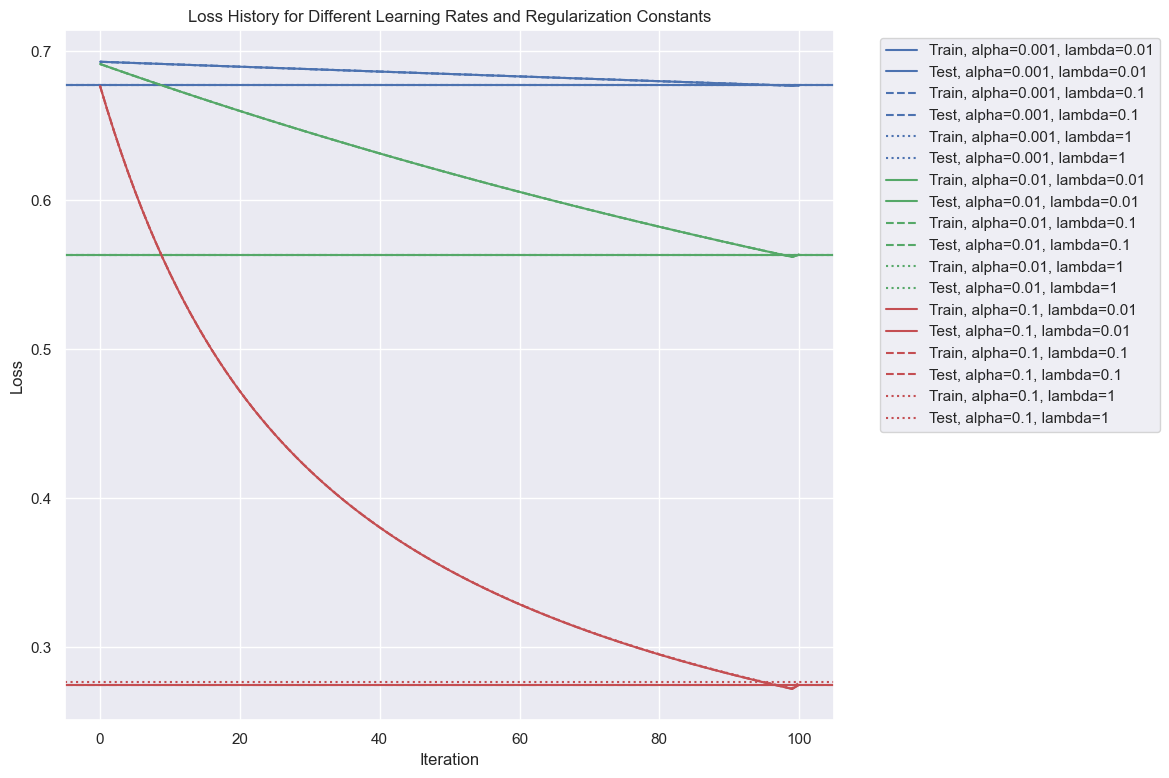

In [13]:
# Import the necessary libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Use seaborn styles for better aesthetics
sns.set()

# Increase the font size for better readability
plt.rcParams.update({'font.size': 14})

# Define the learning rates and regularization constants to be tested
learning_rates = [0.001, 0.01, 0.1]
reg_constants = [0.01, 0.1, 1]

# Split the data into training and test sets (assuming X_train, X_test, y_train, y_test are defined)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initialize a figure to contain the plots
plt.figure(figsize=(12, 8))

# Define colors and line styles for the plot
colors = ['b', 'g', 'r']
line_styles = ['-', '--', ':']

# Iterate over the combinations of learning rates and regularization constants
for i, alpha in enumerate(learning_rates):
    for j, regLambda in enumerate(reg_constants):
        # Fit the model to the training data and retrieve the training loss history
        theta, loss_history_train = fit(X_train, y_train, regLambda, alpha)

        # Predict the labels for the test data
        y_pred = predict(theta, X_test)

        # Calculate the loss for the test data
        loss_test = computeCost(theta, X_test, y_test, regLambda)

        # Print the final loss values
        print(f'alpha={alpha}, lambda={regLambda}, train loss={loss_history_train[-1]}, test loss={loss_test}')

        # Plot the loss history for the training data and a horizontal line for the test loss
        plt.plot(loss_history_train, color=colors[i], linestyle=line_styles[j], label=f'Train, alpha={alpha}, lambda={regLambda}')
        plt.axhline(y=loss_test, color=colors[i], linestyle=line_styles[j], label=f'Test, alpha={alpha}, lambda={regLambda}')

        # Add a pathway line from the final training loss to the test loss
        plt.plot([len(loss_history_train) - 1, len(loss_history_train)], [loss_history_train[-1], loss_test], color=colors[i], linestyle=line_styles[j])

# Add a title, labels, and a legend to the plot
plt.title('Loss History for Different Learning Rates and Regularization Constants')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Add grid lines to the plot
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

## Naive Bayes

In this part, you will use the `GaussianNB` classifier to classify the data. You should not change the default parameters of this classifier. First, train the classifier on the training set and then find the accuracy of it on the test set.

**Question**: What is the accuracy of this method on test set?

**Answer**:

$$ accuracy(y,y_{pred}) = \frac{1}{m} \sum_{i=1}^m \mathcal{I}(\mathbf{y_i}=\mathbf{y_{pred_i}}) $$

Accuracy of the classifier: 0.9282828282828283


In [14]:
# Import the necessary libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Instantiate the Gaussian Naive Bayes classifier
classifier = GaussianNB()

# Fit the classifier to the training data
classifier.fit(X=X_train, y=y_train)

# Use the classifier to predict the labels for the test data
predictions = classifier.predict(X=X_test)

# Calculate the accuracy of the classifier
score = accuracy_score(y_true=y_test, y_pred=predictions)

# Print the accuracy of the classifier
print(f"Accuracy of the classifier: {score}")

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_true=y_test, y_pred=predictions))

# Print the classification report
print("Classification Report:")
print(classification_report(y_true=y_test, y_pred=predictions))

Accuracy of the classifier: 0.9282828282828283
Confusion Matrix:
[[282  68]
 [  3 637]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.81      0.89       350
           1       0.90      1.00      0.95       640

    accuracy                           0.93       990
   macro avg       0.95      0.90      0.92       990
weighted avg       0.93      0.93      0.93       990



## LDA (Linear Discriminant Analysis)

In this part, you will use the `LinearDiscriminantAnalysis` classifier to classify the data. You should not change the default parameters of this classifier. First, train the classifier on the training set and then find the accuracy of it on the test set.

**Question**: What is the accuracy of this method on test set?

**Answer**:

$$ accuracy(y,y_{pred}) = \frac{1}{m} \sum_{i=1}^m \mathcal{I}(\mathbf{y_i}=\mathbf{y_{pred_i}}) $$

Accuracy of the classifier: 0.9848484848484849



In [15]:
### START CODE HERE ###
# Import the necessary libraries
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Instantiate the Linear Discriminant Analysis classifier
classifier = LinearDiscriminantAnalysis()

# Fit the classifier to the training data
classifier.fit(X=X_train, y=y_train)

# Use the classifier to predict the labels for the test data
predictions = classifier.predict(X=X_test)

# Calculate the accuracy of the classifier
score = accuracy_score(y_true=y_test, y_pred=predictions)

# Print the accuracy of the classifier
print(f"Accuracy of the classifier: {score}")

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_true=y_test, y_pred=predictions))

# Print the classification report
print("Classification Report:")
print(classification_report(y_true=y_test, y_pred=predictions))
### END CODE HERE ###

Accuracy of the classifier: 0.9848484848484849
Confusion Matrix:
[[348   2]
 [ 13 627]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       350
           1       1.00      0.98      0.99       640

    accuracy                           0.98       990
   macro avg       0.98      0.99      0.98       990
weighted avg       0.99      0.98      0.98       990



## Conclution

**Question**: What is the best method for classifying this dataset? What is the best accuracy on the test set?

**Answer**: LDA (Linear Discriminant Analysis)